In [ ]:
!pip install scikit-learn keras tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [1]:
# Load the dataset
df = pd.read_csv('Crypto Tracking ML - Archive.csv', usecols=['Date', 'ETHPrice','BTCPrice','BCHPrice'])


NameError: name 'pd' is not defined

In [47]:
df.describe()

,ETHPrice,BTCPrice,BCHPrice
count,1182.000000,1182.000000,1182.000000
mean,1547.596878,22293.874027,126.054069
std,59.372780,914.156201,3.709301
min,1469.700000,21466.300000,120.150000
25%,1506.322500,21754.825000,123.920000
50%,1534.885000,21892.000000,125.330000
75%,1556.872500,22222.850000,126.527500
max,1703.070000,24792.000000,135.770000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1182 non-null   object 
 1   ETHPrice  1182 non-null   float64
 2   BTCPrice  1182 non-null   float64
 3   BCHPrice  1182 non-null   float64
dtypes: float64(3), object(1)
memory usage: 37.1+ KB


In [49]:
df.index

RangeIndex(start=0, stop=1182, step=1)

In [37]:
df

,Date,ETHPrice
0,2/11/2023 23:16:46,1531.81
1,2/11/2023 23:20:46,1532.03
2,2/11/2023 23:26:46,1531.93
3,2/11/2023 23:30:46,1532.34
4,2/11/2023 23:36:46,1530.89
...,...,...
1177,2/16/2023 0:30:30,1684.17
1178,2/16/2023 0:36:30,1684.77
1179,2/16/2023 0:40:30,1684.46
1180,2/16/2023 0:46:30,1685.80


<AxesSubplot:>

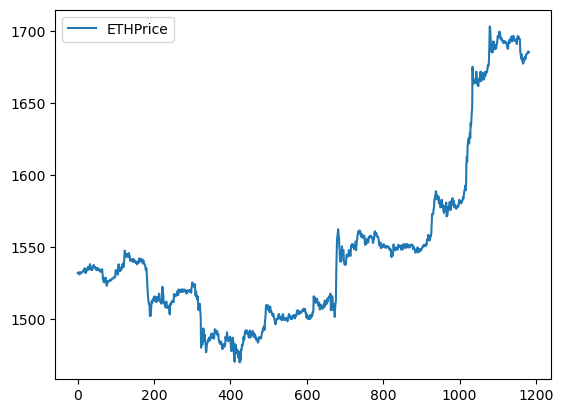

In [38]:
df.plot.line(y="ETHPrice", use_index=True)

In [52]:
df["Next"] = df["ETHPrice"].shift(-1)

In [53]:
df["Target"] = (df["Next"] > df["ETHPrice"]).astype(int)

In [54]:
df

,Date,ETHPrice,BTCPrice,BCHPrice,Next,Target
0,2/11/2023 23:16:46,1531.81,21810.6,124.80,1532.03,1
1,2/11/2023 23:20:46,1532.03,21812.1,124.91,1531.93,0
2,2/11/2023 23:26:46,1531.93,21810.4,124.85,1532.34,1
3,2/11/2023 23:30:46,1532.34,21810.9,124.84,1530.89,0
4,2/11/2023 23:36:46,1530.89,21804.4,124.67,1531.09,1
...,...,...,...,...,...,...
1177,2/16/2023 0:30:30,1684.17,24643.0,134.53,1684.77,1
1178,2/16/2023 0:36:30,1684.77,24658.3,134.57,1684.46,0
1179,2/16/2023 0:40:30,1684.46,24635.7,134.42,1685.80,1
1180,2/16/2023 0:46:30,1685.80,24652.0,134.75,1685.12,0


In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["ETHPrice", "BTCPrice", "BCHPrice"]
model.fit(train[predictors], train ["Target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [56]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [57]:
preds = pd.Series(preds, index=test.index)

In [58]:
precision_score(test["Target"], preds)

0.6666666666666666

In [59]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:>

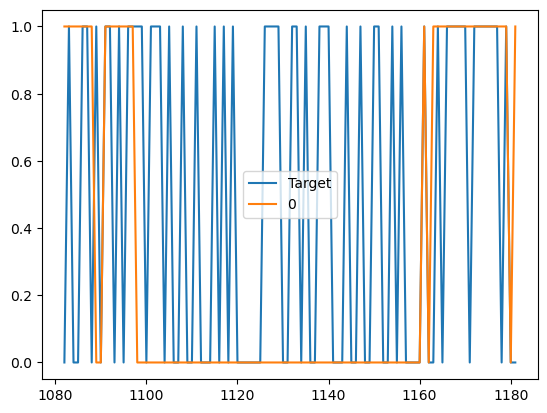

In [60]:
combined.plot()